### Random Forest

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import accuracy_score as acs

In [4]:
hdb_model_data = pd.read_csv("hdb_model_data.csv")
hdb_model_data.head()

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate,cpi_adjusted_price_per_sqm
0,0.0625,0.114583,0.0,0.0,0.229833,0.242702,0.377101,1.0,0.113027
1,0.3750,0.098958,0.0,0.0,0.888889,0.181339,0.376605,1.0,0.339299
2,0.0000,0.114583,0.0,0.0,0.243531,0.153615,0.373691,1.0,0.077851
3,0.0625,0.114583,0.0,0.0,0.223744,0.212727,0.381423,1.0,0.128102
4,0.1250,0.088542,0.0,0.0,0.292237,0.247779,0.408523,1.0,0.084059


In [5]:
hdb_model_data.shape

(77834, 9)

In [6]:
X = hdb_model_data.iloc[:,0:8]
y= hdb_model_data.iloc[:,-1]  

X

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate
0,0.0625,0.114583,0.0,0.0,0.229833,0.242702,0.377101,1.0
1,0.3750,0.098958,0.0,0.0,0.888889,0.181339,0.376605,1.0
2,0.0000,0.114583,0.0,0.0,0.243531,0.153615,0.373691,1.0
3,0.0625,0.114583,0.0,0.0,0.223744,0.212727,0.381423,1.0
4,0.1250,0.088542,0.0,0.0,0.292237,0.247779,0.408523,1.0
...,...,...,...,...,...,...,...,...
77829,0.1250,0.494792,1.0,1.0,0.401826,0.318357,0.669844,0.0
77830,0.1250,0.473958,1.0,1.0,0.380518,0.174104,0.652553,0.0
77831,0.1250,0.473958,1.0,1.0,0.380518,0.174104,0.652553,0.0
77832,0.1875,0.494792,1.0,1.0,0.383562,0.149878,0.653120,0.0


https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
regressor = RandomForestRegressor(n_estimators = 8,  #no. of trees to be used in the model
                        max_depth = 15,  # maximum number of splits each tree can take. Too low the model will be trained less and have high bias
                        min_samples_split = 2, #every node have 2 subnodes
                        max_features = 6)#maximum features in each tree
                       
regressor.fit(X_train,y_train)


y_pred_train = regressor.predict(X_train)  
y_pred_test = regressor.predict(X_test)  
mse = mean_squared_error(y_test,y_pred_test)
print("Coefficient of determination test(R2): %.2f" % metrics.r2_score(y_test, y_pred_test).round(2))
print("Mean Squared Error: "+ str(mse))
rmse = math.sqrt(mse)  
print("Root Mean Squared Error: ", rmse)
adj_r2 = 1 - (1-metrics.r2_score(y_test, y_pred_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2: ", adj_r2)

Coefficient of determination test(R2): 0.94
Mean Squared Error: 0.0007210052549487317
Root Mean Squared Error:  0.026851541016275616
Adjusted R2:  0.9372791847401274


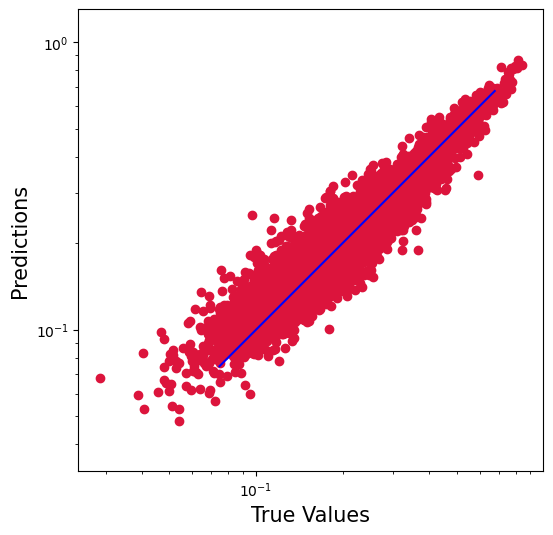

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_test[0:50]), max(y_test[0:50]))
p2 = min(min(y_pred_test[0:50]), min(y_test[0:50]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()